In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [6]:
df=pd.read_csv("train.csv")
df.head(10).T


,0,1,2,3,4,5,6,7,8,9
Id,1,2,3,4,5,6,7,8,9,10
MSSubClass,60,20,60,70,60,50,20,60,50,190
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420
...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal


In [7]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

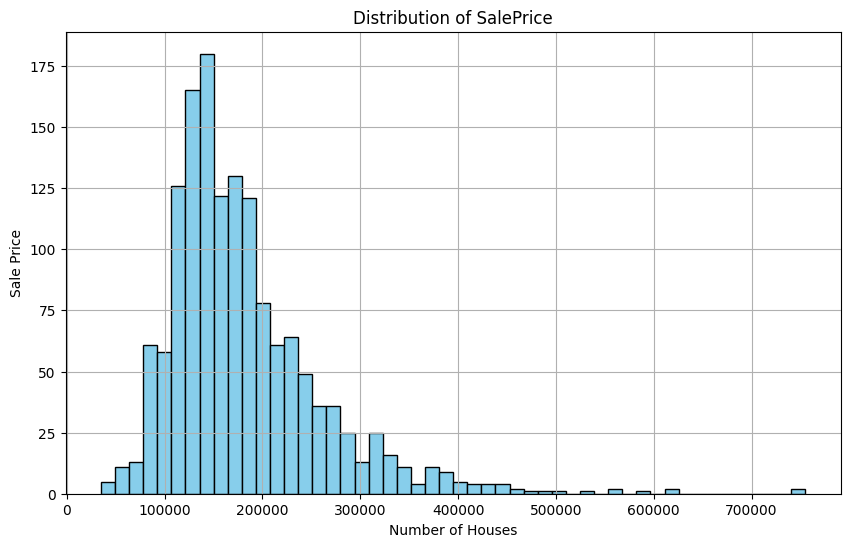

In [9]:

plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('Number of Houses')
plt.ylabel('Sale Price')        # This is the correct label for the x-axis
  # This is the count of houses per price bin
plt.grid(True)
plt.show()


In [59]:
df.isna().sum().T

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [60]:
df["LotFrontage"].value_counts()

LotFrontage
60.0     152
80.0     112
70.0      94
65.0      74
73.0      70
        ... 
138.0      1
152.0      1
88.5       1
153.0      1
46.0       1
Name: count, Length: 115, dtype: int64

In [61]:
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing



Series([], dtype: int64)

In [62]:
df["PoolQC"].value_counts()

KeyError: 'PoolQC'

In [ ]:
df=df.drop("PoolQC",axis=1)

In [ ]:
missing

In [ ]:
df["MiscFeature"].value_counts()

In [ ]:
df["MiscFeature"]

In [ ]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")
df["MiscFeature"].value_counts()

In [ ]:
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing


In [ ]:
df["Electrical"].value_counts()

In [ ]:
df["Electrical"] = df["Electrical"].fillna("SBrkr ")
df["Electrical"].value_counts()

In [16]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [17]:
df["MasVnrArea"].value_counts()

MasVnrArea
0.0      869
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
426.0      1
96.0       1
438.0      1
194.0      1
119.0      1
Name: count, Length: 327, dtype: int64

In [18]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")


In [19]:
df["MasVnrType"].value_counts()

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [20]:
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing


Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
dtype: int64

In [21]:
df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [22]:
df["Alley"] = df["Alley"].fillna("NA")

df["Alley"].value_counts()

Alley
NA      1369
Grvl      50
Pave      41
Name: count, dtype: int64

In [23]:
df["Fence"].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [24]:
df["Fence"] = df["Fence"].fillna("NA")


In [25]:
df["Fence"].value_counts()

Fence
NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

In [26]:
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing

FireplaceQu     690
LotFrontage     259
GarageQual       81
GarageCond       81
GarageType       81
GarageFinish     81
GarageYrBlt      81
BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
BsmtQual         37
BsmtFinType1     37
dtype: int64

In [27]:
df["FireplaceQu"].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [28]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("NA")


In [29]:
df["FireplaceQu"].value_counts()

FireplaceQu
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [30]:
df["LotFrontage"].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
182.0      1
160.0      1
152.0      1
153.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [31]:
df.info().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

AttributeError: 'NoneType' object has no attribute 'T'

In [32]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)


In [33]:
df["LotFrontage"].value_counts()

LotFrontage
60.0     152
80.0     112
70.0      94
65.0      74
73.0      70
        ... 
138.0      1
152.0      1
88.5       1
153.0      1
46.0       1
Name: count, Length: 115, dtype: int64

In [34]:
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing

GarageCond      81
GarageQual      81
GarageType      81
GarageFinish    81
GarageYrBlt     81
BsmtFinType2    38
BsmtExposure    38
BsmtCond        37
BsmtQual        37
BsmtFinType1    37
dtype: int64

In [35]:
garage_cols=[
    "GarageCond","GarageQual","GarageType","GarageFinish"
]         
df[garage_cols]=df[garage_cols].fillna("None")

In [36]:
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing

GarageYrBlt     81
BsmtFinType2    38
BsmtExposure    38
BsmtCond        37
BsmtQual        37
BsmtFinType1    37
dtype: int64

In [37]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)


In [38]:
bsmt_cols = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 
    'BsmtFinType1', 'BsmtFinType2'
]

df[bsmt_cols] = df[bsmt_cols].fillna('None')


In [39]:
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing

Series([], dtype: int64)

In [40]:
df.isna().sum().sum()

np.int64(0)

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [42]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [48]:

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(df)

ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

numeric_cols = df.drop(columns=categorical_cols).columns.tolist()

# Combine all column names
all_cols = list(ohe_feature_names) + numeric_cols

# Turn it into a DataFrame
train_df = pd.DataFrame(X_encoded.toarray(), columns=all_cols)

In [49]:
train_df.head()


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [50]:
train_df.isna().sum().sum()

np.int64(0)

In [53]:
X = train_df.drop("SalePrice", axis=1)
Y = train_df["SalePrice"]

X.shape, Y.shape


((1460, 300), (1460,))